![imagen](./img/python.jpg)

# SQL en Python
Podrás atacar a una base de datos SQL desde muchas plataformas/lenguajes. Por supuesto, Python es uno de ellos. Para ello **utilizaremos el módulo `sqlite3`**, que viene incluido en la suite de paquetes de Anaconda.


1. [Configuración del entorno](#1.-Configuración-del-entorno)
2. [Modelo de datos](#2.-Modelo-de-datos)
3. [Queries](#3.-Queries)

    3.1 [Primera query](#3.1-Primera-query)
    
    3.2 [SELECT](#3.2-SELECT)
    
    3.3 [LIMIT](#3.3-LIMIT)
    
    3.4 [DISTINCT](#3.4-DISTINCT)
    
    3.5 [WHERE](#3.5-WHERE)
    
    3.6 [ORDER BY](#3.6-ORDER-BY)
    
    3.7 [Agregaciones](#3.7-Agregaciones)
    
    3.8 [GROUP BY](#3.8-GROUP-BY)
    
    3.9 [JOIN](#3.9-JOIN)
    
    3.10 [VIEW y DROP](#3.10-VIEW-y-DROP)
    
4. [Errores](#4.-Errores)

5. [Resumen](#5.-Resumen)


## 1. Configuración del entorno
En este taller usaremos también *Pandas*, que es el módulo para tratamiento de datos tabular que más se usa en Python.

Importamos ambos paquetes

In [8]:
import pandas as pd
import sqlite3

In [9]:
import os 

In [20]:
os.getcwd()

'c:\\Users\\Ort\\Desktop\\REPO SEP 24\\2-Data_Analysis\\5-Bases_de_datos\\SQL\\SQL_Python'

In [21]:
os.listdir()

['bbbb.db', 'data', 'ejercicio', 'img', 'my_DB.db', 'SQL_Python.ipynb']

In [25]:
connection = sqlite3.connect("data/chiunuuki.db") # SI ESTA CONECTA Y SI NO LO CREA

In [24]:
connection.close()

Lo primero que hacemos es **establecer conexión con la base de datos**. En este taller simplemente leeremos la base de datos de un archivo, pero lo normal es que tengamos que configurar la conexión a una base de datos de la empresa. Para ello existen otras librerías como `pyodbc` en el caso de un SQLServer o `cx_Oracle`, si el servidor es Oracle.

**¡Asegurate que tienes el archivo chinook.db en la ruta donde se encuentra este Notebook!**

In [4]:
import os
os.getcwd()

'c:\\Users\\Ort\\Desktop\\REPO SEP 24\\2-Data_Analysis\\5-Bases_de_datos\\SQL\\SQL_Python'

In [32]:
# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("data/chinook.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
crsr = connection.cursor()

In [33]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

In [31]:
# sql_query("SELECT * FROM tracks LIMIT 10 ")

![imagen](./img/connection.png)

![imagen](./img/cursor.png)

## 2. Modelo de datos
Antes de empezar a atacar una base de datos, tendremos que saber qué hay dentro, y para ello lo mejor es ver cómo es su **modelo de datos**

![imagen](./img/chinook_data_model.png)

Puedes ver todas las tablas que hay en la base de datos con la siguiente sentencia

In [45]:
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='table'") #   QUERY ESPECIAL PARA VER LAS TABLAS
for name in res:
    print(name[0])

albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1
films


## 3. Queries
En las *queries* o consultas, escribiremos nuestra sentencia SQL para poder traernos datos de la base de datos. Las queries tienen esta pinta:

```SQL
SELECT campo1, campo2, campo3...
FROM tabla
WHERE condiciones
```

Por supuesto, hay más sentencias propias de SQL que iremos viendo a lo largo del Notebook. Fíjate que las **palabras reservadas en SQL se suelen poner en mayúsculas**, para diferenciarlas del resto. No da error si se pone de otra manera, ya que SQL **no es *case sensitive***, pero sí se suele hacer así.

### 3.1 Primera query

In [ ]:
tracks = pd.read_csv("tracks.csv")
tracks.loc[:, :]

In [46]:
query = '''
SELECT * 
FROM tracks
'''
# EL ASTERISTO ES "TODAS LAS COLUMNAS"
df = sql_query(query)
df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2525 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


In [ ]:
tracks.loc[  tracks.Name.str.lower() == "bohemian rhapsody"    ,    :]

In [63]:
sql_query('SELECT * FROM tracks WHERE LOWER(Name) = "bohemian rhapsody"') # EN EL LIKE, LOS % SON EL WILDCARD

,Name,Composer
0,Bohemian Rhapsody,"Mercury, Freddie"


### 3.2 SELECT
**La sentencia `SELECT` se usa para filtrar columnas**. Podremos incluso renombrar algunas columnas dentro del propio `SELECT`. Dos opciones:
* **SELECT * :** de esta forma lo que haremos es traer todos los campos de la tabla. NO es lo recomendable ya que hay tablas que pueden tener cientos de columnas y probablemente no necesitemos todas, por lo que afectará al rendimiento de la maquina y en definitiva al resto de usuarios. **Recuerda que las bases de datos son normalmente entornos compartidos por varios usuarios :)**
* **SELECT campo1, campo2...:** sentencia para escoger los campos concretos que necesitamos.

Además en la propia query podrás renombrar campos mediante la sintaxis `campo as nuevo_nombre`. **Si quieres poner espacios en el nombre del campo, tendrás que rodear el string con comillas dobles**

SQL no es sensible a mayusculas y minusculas.

In [65]:
query = '''
SELECT Name as "Nombre Cancion", composer as "Compositor"
FROM tracks




LIMIT 10000
'''

sql_query(query)

,Nombre Cancion,Compositor
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson"
1,Balls to the Wall,None
2,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Princess of the Dawn,Deaffy & R.A. Smith-Diesel
...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart


### 3.3 LIMIT
Se usa para acotar el número de registros de la query. Va siempre al final. Por ejemplo `LIMIT 10`

In [66]:
query = '''
SELECT Name as "Nombre Cancion", composer
FROM tracks
LIMIT 10
'''

sql_query(query)

,Nombre Cancion,Composer
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson"
1,Balls to the Wall,None
2,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Princess of the Dawn,Deaffy & R.A. Smith-Diesel
5,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson"
6,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson"
7,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson"
8,Snowballed,"Angus Young, Malcolm Young, Brian Johnson"
9,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson"


### 3.4 DISTINCT
Se usa para obtener todos los registros únicos, es decir, sin duplicados. Muy útil tanto para eliminar dupicados, como para ver todas las casuísticas de un campo en concreto.

**Mucho cuidado con esta sentencia ya que si la tabla tiene miles o millones de registros, puede ralentizar mucho la query.**

In [68]:
query = '''
SELECT DISTINCT Composer
FROM tracks
'''

sql_query(query)

,Composer
0,"Angus Young, Malcolm Young, Brian Johnson"
1,None
2,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Deaffy & R.A. Smith-Diesel
...,...
848,Carl Nielsen
849,Niccolò Paganini
850,Pietro Antonio Locatelli
851,Claudio Monteverdi


### 3.5 WHERE
Se usa para filtrar filas. Ejemplos de uso:
* **Un valor numérico**
    * UnitPrice = 0.99
    * UnitPrice >= 0.99
    * UnitPrice < 0.99
* **Un valor string**: Name = 'Restless and Wild'
* **Varios valores**: GenreId in (1, 5, 12)
* **string contenido**:
    * strings que empiecen por 'A': Name like 'A%'
    * strings que acaben en 'A': Name like '%A'
    * strings que lleven 'A' en algun punto: Name like '%A%'
* **Distinto de**: UnitPrice <> 0.99

Probamos el `WHERE`

In [85]:
query = '''
SELECT *
FROM tracks

'''

sql_query(query).groupby("GenreId").count().iloc[:, 0]

GenreId
1     1297
2      130
3      374
4      332
5       12
6       81
7      579
8       58
9       48
10      43
11      15
12      24
13      28
14      61
15      30
16      28
17      35
18      13
19      93
20      26
21      64
22      17
23      40
24      74
25       1
Name: TrackId, dtype: int64

In [86]:
query = '''
SELECT * 
FROM tracks
WHERE unitprice > 0.99
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,226,3,18,None,2622250,490750393,1.99
1,2820,Occupation / Precipice,227,3,19,None,5286953,1054423946,1.99
2,2821,"Exodus, Pt. 1",227,3,19,None,2621708,475079441,1.99
3,2822,"Exodus, Pt. 2",227,3,19,None,2618000,466820021,1.99
4,2823,Collaborators,227,3,19,None,2626626,483484911,1.99
...,...,...,...,...,...,...,...,...,...
208,3362,"There's No Place Like Home, Pt. 1",261,3,21,None,2609526,522919189,1.99
209,3363,"There's No Place Like Home, Pt. 2",261,3,21,None,2497956,523748920,1.99
210,3364,"There's No Place Like Home, Pt. 3",261,3,21,None,2582957,486161766,1.99
211,3428,Branch Closing,251,3,22,None,1814855,360331351,1.99


Veamos qué tal funciona el `LIKE`

In [92]:
query = '''
SELECT * 
FROM tracks
WHERE LOWER(composer) LIKE '%brian johnson%'
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
2,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
3,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
5,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99
6,11,C.O.D.,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",199836,6566314,0.99
7,12,Breaking The Rules,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263288,8596840,0.99
8,13,Night Of The Long Knives,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205688,6706347,0.99
9,14,Spellbound,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",270863,8817038,0.99


Compliquemos un poco más el `WHERE`

In [ ]:
mask1 = tracks.unitprice > 0.99 | tracks.bytes > 100000000
mask2 = tracks.genreid.isin(21, 22, 23)
mask3 =  'al' in tracks.Name


tracks.loc[mask1 & mask2 & mask3         , :]

In [93]:
query = '''
SELECT * 
FROM tracks
WHERE (unitprice > 0.99 or bytes > 100000000) 
    and genreid in (21, 22, 23) 
    and Name LIKE '%al%'
    
'''

df = sql_query(query)
df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2844,Better Halves,228,3,21,None,2573031,549353481,1.99
1,2849,Fallout,228,3,21,None,2594761,501145440,1.99
2,2862,The Glass Ballerina,229,3,21,None,2637458,535729216,1.99
3,2882,Lost Survival Guide,229,3,21,None,2632590,486675063,1.99
4,2899,The Man from Tallahassee,229,3,21,None,2637637,550893556,1.99
5,2922,"Live Together, Die Alone, Pt. 1",231,3,21,None,2478041,457364940,1.99
6,3211,Traveling Salesmen,251,3,22,None,1289039,250822697,1.99
7,3219,Product Recall,251,3,22,None,1268268,251208610,1.99


### 3.6 ORDER BY
Podemos **ordenar la tabla por el campo/s que queramos**. Por defecto ordena alfabéticamente los strings y de menor a mayor los tipos numéricos. Si quieres que ordene al revés, tienes que poner `DESC` de la forma `ORDER BY campo DESC`

In [100]:
query = '''
SELECT * 
FROM tracks
ORDER BY Milliseconds;
'''

sql_query(query)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2461,É Uma Partida De Futebol,200,1,1,Samuel Rosa,1071,38747,0.99
1,168,Now Sports,18,1,4,None,4884,161266,0.99
2,170,A Statistic,18,1,4,None,6373,211997,0.99
3,178,Oprah,18,1,4,None,6635,224313,0.99
4,3304,Commercial 1,258,1,17,L. Muggerud,7941,319888,0.99
...,...,...,...,...,...,...,...,...,...
3498,3227,"Battlestar Galactica, Pt. 2",253,3,20,None,2956081,521387924,1.99
3499,3242,The Man With Nine Lives,253,3,20,None,2956998,577829804,1.99
3500,3244,"Greetings from Earth, Pt. 1",253,3,20,None,2960293,536824558,1.99
3501,3224,Through a Looking Glass,229,3,21,None,5088838,1059546140,1.99


### 3.7 Agregaciones
En ocasiones nos interesa obtener algún estadístico como el máximo de un campo, su desviación estándar o simplemente un conteo de registros no nulos. Para ello podemos usar funciones como `MAX`, `COUNT` o `AVG`. En [esta página](https://www.sqlservertutorial.net/sql-server-aggregate-functions/) encontrarás un resumen con las principales funciones.

In [108]:
# Aggregations
query = '''
SELECT AVG(Milliseconds)
FROM tracks
WHERE GenreId = 2;
'''

sql_query(query)

,AVG(Milliseconds)
0,291755.376923


In [107]:
# Aggregations
query = '''
SELECT AVG(Milliseconds)
FROM tracks
WHERE GenreId = 1;
'''

sql_query(query)

,AVG(Milliseconds)
0,283910.043177


In [110]:
query = '''
SELECT AVG(unitprice)
FROM invoice_items;
'''

sql_query(query)

,AVG(unitprice)
0,1.039554


### 3.8 GROUP BY
Es una sentencia muy útil para **calcular agregados en función de otro campo**. Por ejemplo, para calcular el total del precio unitario en función del género


In [128]:
query = """
SELECT Country, State, count(*) FROM customers 

GROUP BY  Country, State

 """
sql_query(query)

,Country,State,count(*)
0,Argentina,None,1
1,Australia,NSW,1
2,Austria,None,1
3,Belgium,None,1
4,Brazil,DF,1
5,Brazil,RJ,1
6,Brazil,SP,3
7,Canada,AB,1
8,Canada,BC,1
9,Canada,MB,1


In [ ]:
tracks.groupby("GenreId")["unitprice"].sum().sort_values("unitprice").head(10)

In [116]:
sql_query("SELECT * FROM genres")

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [115]:
query = '''
SELECT GenreId, SUM(unitprice) AS TOTAL_PRICE
FROM tracks
GROUP BY GenreId
ORDER BY TOTAL_PRICE DESC
LIMIT 10;
'''

sql_query(query)

,GenreId,TOTAL_PRICE
0,1,1284.03
1,7,573.21
2,3,370.26
3,4,328.68
4,19,185.07
5,2,128.70
6,21,127.36
7,6,80.19
8,24,73.26
9,14,60.39


O calcular cuantas canciones hay por compositor

CURCO BAIN

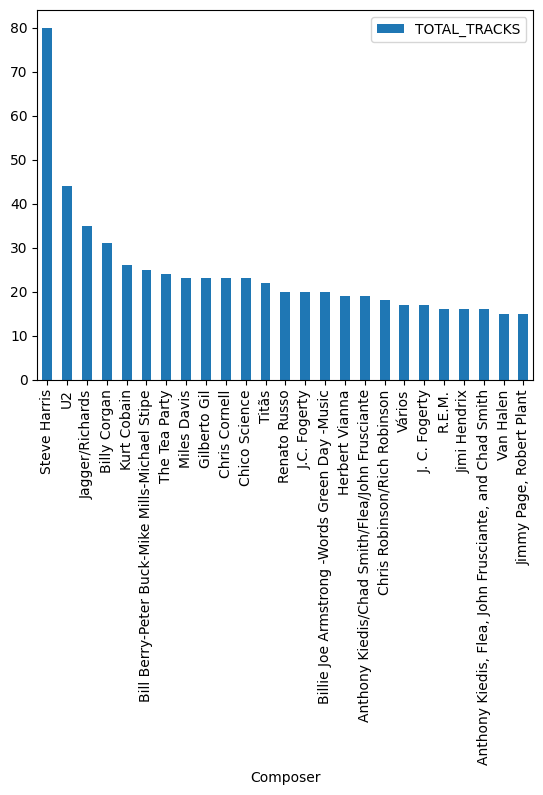

In [142]:
query = '''
SELECT composer, COUNT(trackid) AS TOTAL_TRACKS
FROM tracks
WHERE Composer IS NOT NULL
GROUP BY composer
ORDER BY TOTAL_TRACKS DESC
LIMIT 25
;
'''

sql_query(query).plot(kind="bar", x="Composer");

### 3.9 JOIN
Hasta ahora hemos hecho queries sobre una única tabla, pero **¿y si queremos juntar datos de varias tablas?** Para eso están los `JOIN`s. Para ello **necesitas tener uno o varios campos comunes entre ambas tablas, que denominan CLAVES**.

**¿Cuándo usarlos?** Por ejemplo, si tenemos una tabla con un conjunto de clientes y necesitamos añadirles campos nuevos, tendremos que acudir a otras tablas donde esté ese identificador de cliente y aplicar un `JOIN`. Es lo que se conoce como *pegar campos* a otra tabla.

O imagina que tienes una tabla con todos tus pedidos, con muchos campos(ciudad, dirección, cliente...) y en otra tabla únicamente los números de pedido que no se llegaron a entregar. Si quieres filtrar dentro de tu tabla total de pedidos los que no se llegaron a entregar, podrías aplicar un `INNER JOIN` de manera que te quedes con lo común en ambas tablas, siendo tu clave el identificativo del pedido..

Existen varios tipos de JOINs:

![imagen](./img/joins.jpg)

![imagen](./img/chinook_data_model.png)

In [ ]:
pd.merge(tracks, genres, how="inner", on_left="GenreId", on_right="GenreId")

In [157]:
query = """   
SELECT  tracks.Name AS Track_Name, 
        genres.Name AS Genre,
        Composer 

FROM tracks  
INNER JOIN genres 
ON tracks.GenreId = genres.GenreId

WHERE Genre = "Pop"

"""
sql_query(query)


,Track_Name,Genre,Composer
0,"Dig-Dig, Lambe-Lambe (Ao Vivo)",Pop,Cassiano Costa/Cintia Maviane/J.F./Lucas Costa
1,Pererê,Pop,Augusto Conceição/Chiclete Com Banana
2,TriboTchan,Pop,Cal Adan/Paulo Levi
3,"Tapa Aqui, Descobre Ali",Pop,Paulo Levi/W. Rangel
4,Daniela,Pop,Jorge Cardoso/Pierre Onasis
5,Bate Lata,Pop,Fábio Nolasco/Gal Sales/Ivan Brasil
6,Garotas do Brasil,Pop,"Garay, Ricardo Engels/Luca Predabom/Ludwig, Ca..."
7,Levada do Amor (Ailoviu),Pop,Luiz Wanderley/Paulo Levi
8,Lavadeira,Pop,"Do Vale, Valverde/Gal Oliveira/Luciano Pinto"
9,Reboladeira,Pop,Cal Adan/Ferrugem/Julinho Carioca/Tríona Ní Dh...


In [155]:
#INNER JOIN
query = '''
SELECT a.name as track_name, a.composer, b.name as genre_name
FROM tracks AS a
INNER JOIN genres AS b
ON a.genreid = b.genreid
;
'''

sql_query(query)

,track_name,Composer,genre_name
0,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",Rock
1,Balls to the Wall,None,Rock
2,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",Rock
3,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock
4,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,Rock
...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,Classical
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,Classical
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,Classical
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,Classical


In [160]:
query = '''
SELECT  genres.Name as Genre_Name, 
        SUM(tracks.UnitPrice) as Total_Price
        
FROM tracks
INNER JOIN genres
on tracks.GenreId=genres.GenreId
/*WHERE ...*/
GROUP BY genres.Name
ORDER BY Total_Price DESC

LIMIT 10;
'''

sql_query(query)

,Genre_Name,Total_Price
0,Rock,1284.03
1,Latin,573.21
2,Metal,370.26
3,Alternative & Punk,328.68
4,TV Shows,185.07
5,Jazz,128.70
6,Drama,127.36
7,Blues,80.19
8,Classical,73.26
9,R&B/Soul,60.39


![imagen](./img/chinook_data_model.png)

NUMERO DE FACTURAS POR PAIS



In [166]:
query = """  
SELECT customers.Country, COUNT(*) AS Total

FROM customers
INNER JOIN invoices
ON customers.CustomerId = invoices.CustomerId


GROUP BY customers.Country
ORDER BY Total DESC

"""

sql_query(query)

,Country,Total
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7


In [161]:

query = '''
SELECT tracks.TrackId, tracks.name, tracks.composer, invo.invoicelineid, invo.invoiceid

FROM tracks
INNER JOIN invoice_items AS invo
ON tracks.TrackId = invo.TrackId

;
'''

sql_query(query)

,TrackId,Name,Composer,InvoiceLineId,InvoiceId
0,2,Balls to the Wall,None,1,1
1,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",2,1
2,6,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",3,2
3,8,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",4,2
4,10,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",5,2
...,...,...,...,...,...
2235,3136,Looking For Love,Sykes,2236,411
2236,3145,Sweet Lady Luck,Vandenberg,2237,411
2237,3154,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",2238,411
2238,3163,Samba pras moças,Grazielle/Roque Ferreira,2239,411


In [167]:

query = '''
SELECT name as track_title, albumid
FROM tracks
;
'''

sql_query(query)

,track_title,AlbumId
0,For Those About To Rock (We Salute You),1
1,Balls to the Wall,2
2,Fast As a Shark,3
3,Restless and Wild,3
4,Princess of the Dawn,3
...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",345
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346


In [181]:
query = """   
SELECT 
        tracks.Name AS Song,
        genres.Name AS Genre,
        artists.Name AS Artist, 
        albums.Title AS Album_Title


FROM tracks
LEFT JOIN albums
    ON tracks.AlbumId = albums.AlbumId
INNER JOIN artists
    ON albums.ArtistId = artists.ArtistId

    
INNER JOIN genres
    ON tracks.GenreId = genres.GenreId


"""

sql_query(query)

,Song,Genre,Artist,Album_Title
0,For Those About To Rock (We Salute You),Rock,AC/DC,For Those About To Rock We Salute You
1,Put The Finger On You,Rock,AC/DC,For Those About To Rock We Salute You
2,Let's Get It Up,Rock,AC/DC,For Those About To Rock We Salute You
3,Inject The Venom,Rock,AC/DC,For Those About To Rock We Salute You
4,Snowballed,Rock,AC/DC,For Those About To Rock We Salute You
...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Classical,Eugene Ormandy,Respighi:Pines of Rome
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Classical,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Classical,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Classical,Nash Ensemble,Mozart: Chamber Music


In [188]:
query = """  
SELECT * 

FROM 

(SELECT * 

FROM 

(SELECT tracks.GenreId, 
        SUM(tracks.UnitPrice) AS Sum_price, 
        AVG(tracks.Milliseconds) AS Milli_Mean

FROM tracks
INNER JOIN albums
    ON tracks.AlbumId = albums.AlbumId

GROUP BY tracks.GenreId) as pt

WHERE pt.Sum_price	> 300) AS st

WHERE st.Milli_Mean > 240000

"""

sql_query(query)

,GenreId,Sum_price,Milli_Mean
0,1,1284.03,283910.043177
1,3,370.26,309749.443850


In [18]:
#LEFT JOIN
query = '''
SELECT a.name as track_title , b.title as album_title
FROM tracks AS a
LEFT JOIN albums AS b
ON a.albumid = b.albumid
'''

df_lj = sql_query(query)
# df_lj[df_lj['album_title'].isna()]
df

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,2844,Better Halves,228,3,21,None,2573031,549353481,1.99
1,2849,Fallout,228,3,21,None,2594761,501145440,1.99
2,2862,The Glass Ballerina,229,3,21,None,2637458,535729216,1.99
3,2882,Lost Survival Guide,229,3,21,None,2632590,486675063,1.99
4,2899,The Man from Tallahassee,229,3,21,None,2637637,550893556,1.99
5,2922,"Live Together, Die Alone, Pt. 1",231,3,21,None,2478041,457364940,1.99
6,3211,Traveling Salesmen,251,3,22,None,1289039,250822697,1.99
7,3219,Product Recall,251,3,22,None,1268268,251208610,1.99


In [115]:
query = '''
SELECT * 
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid
LIMIT 5;
'''

sql_query(query)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,1,2,0.99,1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
1,2,1,4,0.99,1,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
2,3,2,6,0.99,1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
3,4,2,8,0.99,1,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,5,2,10,0.99,1,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [19]:
query = '''
SELECT * 
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid

UNION


SELECT *
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid =b.trackid


LIMIT 5;
'''

sql_query(query)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,1,2,0.99,1,2,Balls to the Wall,2,2.00,1,None,342562,5510424.00,0.99
1,1,For Those About To Rock (We Salute You),1,1.00,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,579,108,1,0.99,1.00
2,2,1,4,0.99,1,4,Restless and Wild,3,2.00,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779.00,0.99
3,2,Balls to the Wall,2,2.00,1,None,342562,5510424,0.99,1,1,2,0.99,1.00
4,2,Balls to the Wall,2,2.00,1,None,342562,5510424,0.99,1154,214,2,0.99,1.00


In [121]:
#FULL JOIN
#FULL JOIN isn't supported in sqlite, 
#so we use a LEFT JOIN + RIGHT JOIN(inverse LEFT JOIN) as a workaround

query = '''
SELECT * 
FROM invoice_items AS a
LEFT JOIN tracks AS b
ON a.trackid = b.trackid
UNION
SELECT *
FROM tracks AS a
LEFT JOIN invoice_items AS b
ON a.trackid =b.trackid;
'''

sql_query(query)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,1,2,0.99,1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
1,2,1,4,0.99,1,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
2,3,2,6,0.99,1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
3,4,2,8,0.99,1,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
4,5,2,10,0.99,1,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,3136,Looking For Love,141,1,3,Sykes,391941,12769847,0.99
2236,2237,411,3145,0.99,1,3145,Sweet Lady Luck,141,1,3,Vandenberg,273737,8919163,0.99
2237,2238,411,3154,0.99,1,3154,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,248,1,7,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",107206,3593684,0.99
2238,2239,411,3163,0.99,1,3163,Samba pras moças,248,1,7,Grazielle/Roque Ferreira,152816,5121366,0.99


### 3.10 VIEW y DROP
En ocasiones resulta útil **dividir nuestras queries en varios pasos**, y para ello utilizamos la sentencia `VIEW`. Con `VIEW` creamos una *vista* de una tabla, es decir, obtenemos una tabla temporal que usaremos después.

Estas vistas se guardarán en el archivo *.db*, por lo que tendrás que tener cuidado de no almacenar muchas tablas poco útiles.

Primero, veamos cómo acceder a todas las vistas de la base de datos

In [27]:
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='view'")
for name in res:
    print(name[0])

Creamos dos vistas nuevas

In [28]:
query1 = '''
CREATE VIEW name_composer as
SELECT name, composer, genreid
FROM tracks
;
'''

query2 = '''
CREATE VIEW genre as
SELECT name, genreid
FROM genres
WHERE name LIKE "b%";
'''

crsr.execute(query1)
crsr.execute(query2)

#sql_query(query)

Comprueba que ahora tienes vistas nuevas en tu base de datos

In [29]:
res = crsr.execute("SELECT name FROM sqlite_master WHERE type='view';")
for name in res:
    print(name[0])

name_composer
genre


Puedes borrar las vistas mediante `DROP VIEW`. Prueba a borrarlas, comprueba que ya no existen y vuelve a crearlas.

**NOTA**: `DROP` también lo podrás usar como `DROP TABLE`. Nos cargaríamos una tabla entera de la base de datos y ya no sería recuperable, el *ctrl + Z* no te va a salvar. así que mucho cuidado con esta sentencia.

In [26]:
query1_ = '''
DROP VIEW IF EXISTS name_composer;
'''
query2_ = '''
DROP VIEW IF EXISTS genre;
'''

crsr.execute(query1_)
crsr.execute(query2_)

Ahora que ya tenemos nuestras vistas, vamos a realizar otra operación con ambas tablas. En este caso, aplicamos un `JOIN`

Fíjate que la salida de esta query es la misma que la del primer `JOIN` de este Notebook, pero en este caso, hecho en dos pasos.

In [145]:
query = '''
SELECT a.name, a.composer, b.name
FROM name_composer AS a
INNER JOIN genre AS b
ON a.genreid = b.genreid
;
'''

df = sql_query(query)

In [147]:
df.to_csv('my_dataset.csv')

## 4. Errores

<table align="left">
 <tr><td width="80"><img src="./img/error.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>ERRORES Acceso a base de datos que no existe</h3>
         
 </td></tr>
</table>

¡Cuidado! No da error, sino que crea una base de datos vacía

In [30]:
# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("bbbb.db")

crsr = connection.cursor()

<table align="left">
 <tr><td width="80"><img src="./img/error.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>ERRORES en la query</h3>
         
 </td></tr>
</table>

Los errores son todos del mismo tipo: `OperationalError`. Esto nos indica que lo da el propio SQL, no es un error del intérprete de Python como tal. Ahora bien, aunque lo de SQL, devuelve un descriptivo con el tipo de error, que está bastante bien para ver por donde van los tiros.

In [31]:
query = '''
SELECT * 
FROM tracks
'''

sql_query(query)

OperationalError: no such table: tracks

In [32]:
query = '''
SELECT * 
FROM tracksssss
'''

sql_query(query)

OperationalError: no such table: tracksssss

In [141]:
query = '''
SELECT campo1, campo2
FROM tracks
'''

sql_query(query)

OperationalError: no such table: tracks

## 5. Resumen
**SQL es el estándar que se utiliza en el acceso a las BBDD relacionales**, por lo que en prácticamente cualquier empresa te vas a encontrar una BD de este tipo. La sintaxis es:

```SQL
SELECT campo1, campo2, campo3...
FROM tabla
WHERE condicionales
```

Y podrás realizar las siguientes acciones:
1. **Filtrar columnas**: mediante `SELECT`
2. **Renombrar campos**: mediante `SELECT campo as nuevo_nombre`
3. **Eliminar duplicados**: mediante `DISTINCT`
4. **Limitar el número de registros**: `LIMIT`
5. **Filtrar filas**: `WHERE`
6. **Ordenar una tabla**: `ORDER BY campo1, campo2` y `DESC`
7. **Agregar información**: sacar un KPI como un máximo o un conteo: `MAX`,`COUNT`,`AVG`...
8. **Agregado a nivel grupo**: con `GROUP BY`. Se calculan las funciones de agregación para cada grupo de una columna.
9. **Juntar datos**: mediante `JOIN`. Hay de varios tipos: `LEFT`, `RIGHT`, `FULL`, `INNER` y `OUTER`.
10. **Tablas temporales**: con `VIEW`
11. **Eliminar tablas o vistas**: con `DROP`

Y si te manejas de maravilla con la librería pandas, **siempre puedes obtener tus datos mediante una query con sqlite3, y tratarlos posteriormente en Python, mediante las funciones de pandas.**

In [189]:
query = """   
SELECT * FROM tracks

"""
tracks = sql_query(query )

In [190]:
tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [191]:
query = """   
SELECT * FROM albums

"""
albums = sql_query(query )

In [194]:
import pandas as pd

In [198]:
query = """   
SELECT * FROM artists

"""
artists = sql_query(query )

In [197]:
tracks_albums = pd.merge(tracks, albums, how="inner", left_on="AlbumId", right_on="AlbumId")
tracks_albums.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Title,ArtistId
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,Balls to the Wall,2
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Restless and Wild,2
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Restless and Wild,2
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Restless and Wild,2


In [201]:
total = pd.merge(tracks_albums, artists, how="inner", left_on="ArtistId", right_on="ArtistId").loc[:, ["Name_x", "Title", "Name_y"]]
total.columns = ["Song", "Title", "Artist"]
total

,Song,Title,Artist
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Balls to the Wall,Accept
2,Fast As a Shark,Restless and Wild,Accept
3,Restless and Wild,Restless and Wild,Accept
4,Princess of the Dawn,Restless and Wild,Accept
...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Nash Ensemble
